# Using Machine Learning to Solve Classification Problems

CSC/DSC 340 Week 4 Lecture Notes

Author: Dr. Julie Butler

Date Created: August 13, 2023

Last Modified: August 14, 2023

## What are Classification Problems?

The goal of a classification problem is to determine what grouo (or class) a data point belongs to.  A requirement of classification problems is that the number of possible groups has to be finite. This is what makes classification different from regression. In a regression problem, the output of the machine learning model can be any real number, making the number of possible outputs infinite. The machine learning problems we have done thus far in this course are regression. In a classification problem, the outputs have to be taken from a finite and discrete set of values, with each value corresponding to one of the groups.

## Classification Examples

1. In the pre-class homework for this week, you determined in the condition of a car (i.e like new, good, poor, etc.) could be determined by looking at its price and odometer reading.
2. In these lecture notes and in the in-class assignment for this week we will be determining if we can tell the exact species of a plant or animal by looking at various measurements.
3. In the post-class homework for this week you will determine if the sex of possums and crabs can be determined by looking at the sizes and masses of the animals.
4. A common classification example shown in Chapter 3 of**Hands-On Machine Learning* is called the MNIST data set and the goal of this is to determine what digit is being displayed in a picture of handwriting. We will explore this data set later in the course when we look at convolutional neural networks.
5. Another common data set used in classification examples is called the Fashion MNIST data set.  This data set contains pictures of clothing items with the goal of classifying the type of clothing shown in the picture (i.e. shirt, jacket, pants, shoes, etc.). We will also cover this data set when we study convolutional neural networks later in the course.
6. As a final example, a lot of real life classification examples involve photo recognization. For example, determining if a picture contains a cat or a dog, or determining who is in a photo you take with your phone. 

## Types of Clasification Problems

There are several different types of classification problems, and we will discuss two of them here. A binomial classification problem means that the data can be split up into only two groups. If there are more than two groups the data can be divided into then the problem is a multiclass classification problem. And finally, if a data point can belong to more than one category the the classification problem is called multilabel classification. As an example of this type of classification, when you phone is classifying your photos based on who is in the picture, it is possible for a photo to contain more than one person, and this be classified into more than one category.

## Classifiers

We will only be looking at one classifier this week, ridge classifier, which is an implementation of ridge regression specifically for classification. However, there are other classification algorithms as well. Stochastic Gradient Descent is the classification algorithm used in the examples of Chapter 3 of *Hands-On Machine Learning*.  Support vector machines are also commonly used for more complicated classification problems. As hinted in the classification examples section, neural networks and convolutional neural networks can also be used for classification.  We will cover neural networks and convolutional neural networks later in this course, but we will not cover stochastic gradient descent or support vector machines.  However, these algorithms are still valid machine learning tools to use on your final project if you are attempting to answer a question that can be framed as a classification problem.

### Ridge Classifer
 We will be using Scikit-Learn's implementation of ridge classifier to perform classifications this week. Ridge classifier is simply ridge regression, modified to perform classification instead of regression. If the problem is a binomial classification, then the ridge regression algorithm is trained to produce outputs between -1 and 1. If the output is negative then the data point belongs to the first class and if the output is positive then the output belongs to the second class. For multiclass classfication, the ridge regression will produce an output with more than one number (called multi-output regression). Whichever output has the highest value determines the class the data point belongs too.  For example, if the classification problem has four categories, the ridge classifier will output four numbers.  For a specific data point, if the third number of the output is the largest, then that data point belongs to the third class.

## Error Metrics

Previously, when using machine learning for regression problems, we have have used error metrics such as the mean-squared error to determine the accuracy of our models. When we move to classification problems, we will have to change our error metrics to better reflect a classification problem.  Several different error metrics are discussed in Chatper 3 of *Hands-On Machine Learning*, and we will cover two of the more common ones here: accuracy score and confusion matrix.

### Accuracy Score

The accuracy score is a measure of how many classifications the trained algorithm got correct compared to the total number of classification it attempted.  It is simply calculated as:

$$ Score = \frac{Number\ of\ Correct\ Predictions}{Total\ Number\ of\ Data\ Points}.$$

An accuracy score of 1.0 means that 100% of the attempted classifications were correct and an accuracy score of 0.0 means that 0% of the attempt classifications were correct. Therefore in the case of the accuracy score (like the R2-score) a result closer to 1.0 is better.

### Confusion Matrix
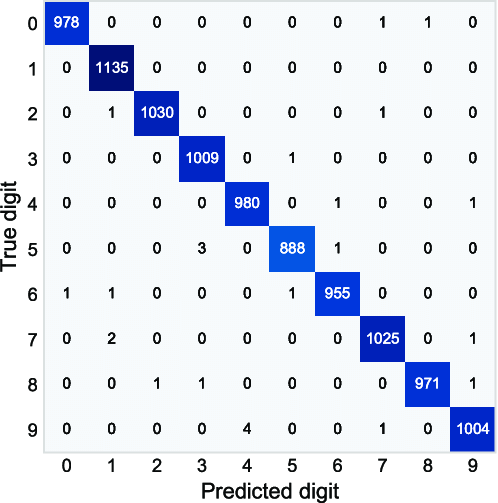
[Image Source](https://www.researchgate.net/figure/Confusion-matrix-for-the-MNIST-dataset-with-the-best-ensemble_fig3_328816477)

A confusion matrix is a way to visualize how many predictions the trained algorithm got correct but also what predictions it got wrong. Confusions matrices can look complicated, but with a little practice they are easy to read. Each row represents an actual class and each column represent a predicted class. An element in row A of column B of a confusion matrix is the number of times an A was predicted to be a B.  This means that accurate predictions are the numbers on the main diagonal of teh matrix and incorrect predictions are the other numbers.

If we look at the example provided, this is a confusion matrix from the MNIST data set, attempting to classify handwritten numbers correctly. We see that this classifier did a good job as the numbers on the diagonal are very large and the off diagonal numbers are quite small. There are some off diagonal which correspond to errors that we can investigate. For example, one of the largest errors occurs when 4 images of the number 9 were classified as the number 4, an understandable mistake. There were also three images of the number 5 that were classified as a 3, another understandable mistake. 

Confusion matrices are useful because they help us determine not only how many errors are being made, but also what kinds of errors. Some amount of error is inevitable, such as the errors we just looked at, but confusion matrices can also help us determine where poorly trained models are confused and making wrong predictions.





## Example: The Iris Data Set and the Ridge Classifier

A famous example used in classification is called the iris data set. The iris data set contains measurements of different iris flowers, along with the specific type of iris flower that is being measured (one of three types). Therefore the goal of the iris data set is to determine what type of iris is being measured.

First we have our imports.

In [1]:
##############################
##          IMPORTS         ##
##############################
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split

Next we load the iris data set from Scikit-Learn and convert it to Pandas Dataframe for easy display

In [2]:
# Load the iris dataset from sklearn
iris = load_iris()

# Convert the iris dataset to a pandas dataframe
iris_data = pd.DataFrame(iris.data, columns=iris.feature_names)

# Add the target variable to the dataframe
iris_data['target'] = iris.target

Now we can examine the data set and see it contains four length measurements. The target column is a numerical encoding of the type of iris being measured, with the classes 0, 1, and 2 corresponding to the three different types of iris flowers.

In [3]:
iris_data

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0         0  
1         0  
2         0  
3         0  
4         0  
..      ...  
145       2  
146       2  
147       2  
148       2  
149       2  

[150 rows x 5 columns]

Next we can create a pairplot with the color of each dot on the plot corresponding to the type of flower. Pairplots are useful in classification problems because they help us determine if the different classes are separate (and thus easy to classify) or if they overlap (and this will be harder to classify).  We can see based on this pairplot it should be pretty easy to determine which flowers below of class 0, as these always seem to cluster separately.  However, classes 1 and 2 tend to overlap quite a bit, so separating flowers from these two classes is likely going to be more difficult.

C:\Users\butlerju\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


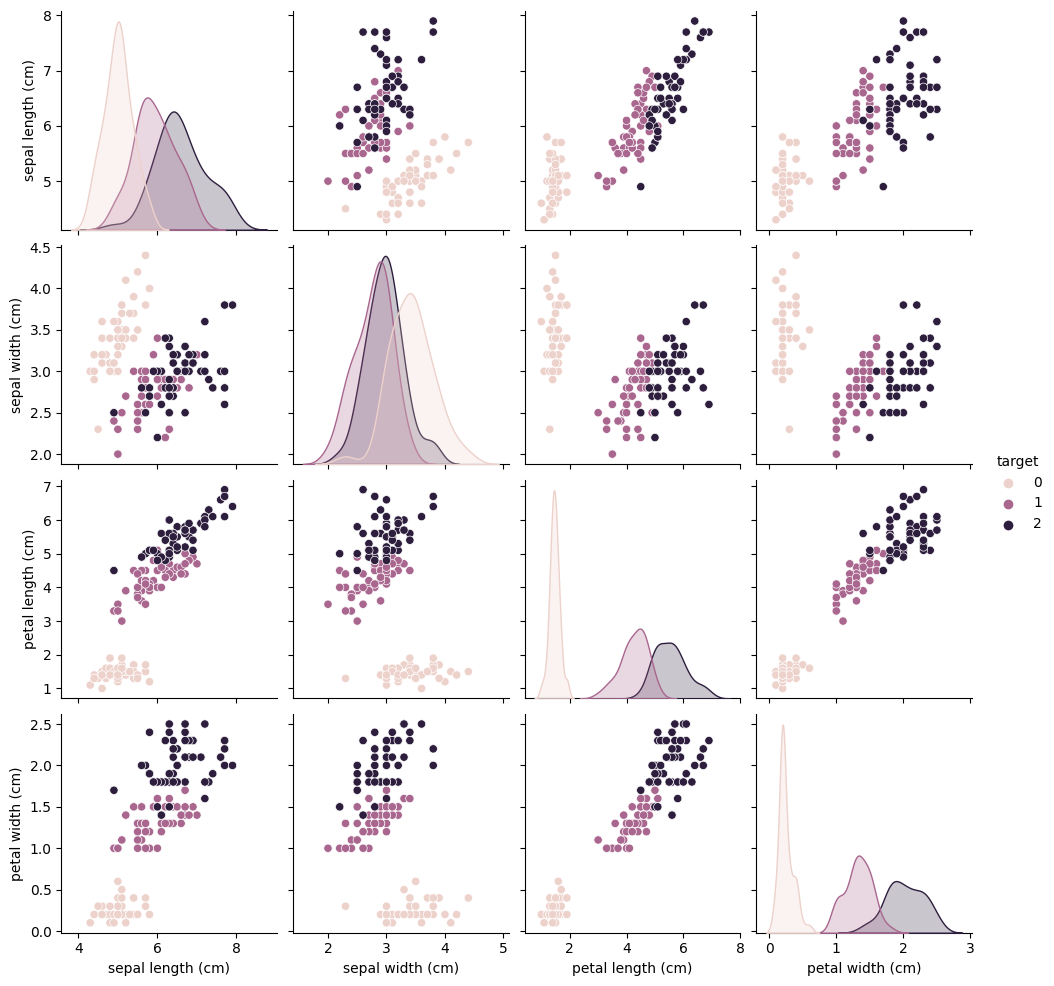

In [4]:
sns.pairplot(iris_data, hue='target')

Now let us separate the x data from the y data. In classification problems it is more common to use the term features when describing the input data than x-data and it is more common to call the outputs targets or labels than y-data.  These terms are used interchangeably so it does not matter which term you use when describing your work but it is good to be familiar with the different terminologies when reading different sources. 

First, we want our features to be the length columns of the Dataframe, so we drop the target column. The target column then becomes our labels. We perform a train-test split as normal, setting aside 20% of the data set to use for testing.

In [14]:
features = iris_data.drop(columns=['target'])
labels = iris_data['target']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

We then define our classifier, train it, and then used the trained model to predict new data using the same syntax of all other Scikit-Learn machine learning models we have used so far.

In [15]:
ridge_classifier = RidgeClassifier()
ridge_classifier.fit(X_train, y_train)
y_pred = ridge_classifier.predict(X_test)

Producing the accuracy score is quite simple after training the model.  Depending on the randomization of the train-test split, the model should have an accuracy of between 0.7 to 0.9.  This means that the model is getting 70% to 90% of the predictions correct, which is a good number considering the simlicity of the classifier.

In [16]:
print(ridge_classifier.score(X_test, y_test))

0.8666666666666667


Next, we can print out the confusion matrix. Again the exact numbers printed depend on the randomization of the data splitting, but there are some general patterns. The largest numbers should be on the main diagonal, meaning that the models gets most predictions correct, corresponding to the value of the accuracy score. The first row should only have a number in the first column, meaning that data points that are actually in clas 0 are predicted to be in class zero.  Furthermore, there should only be a number in the first position of the first column, meaning that all predicted class 0 data points were actually in class 0. This corresponds to what we learned with the pairplot: the class 0 data points were clustered by themselves and did not mix with the other classes. The errors in our predictions then come from the class 1 and class 2 predictions.  There are a small number of class 1 data points that were predicted as being class 2, and vice versa. These errors appear unavoidable based on the pairplot from earlier, but in fact, more complicated classifiers are able to very accurately split class 1 from class 2. These include neural networks which we wil learn about later in the course.

In [17]:
confusion_matrix(y_test, y_pred)

array([[15,  0,  0],
       [ 0,  4,  4],
       [ 0,  0,  7]], dtype=int64)

Since we only have three classes in this example, out confusion matrix is not hard to read as a matrix, but if the number of classes was larger it would be more difficult. Therefore, we need to find a way to display the confusion matrix in a easy to read graph. The most common way is to use `matshow` from matplotlib to graph the matrix as a grid of colored squares. The color of the square corresponds to the value of the matrix element in that location. The color bar can be added to the graph to provide a key for the colors. This form of displaying the confusion matrix is easier to read, especially for a larger number of classes.

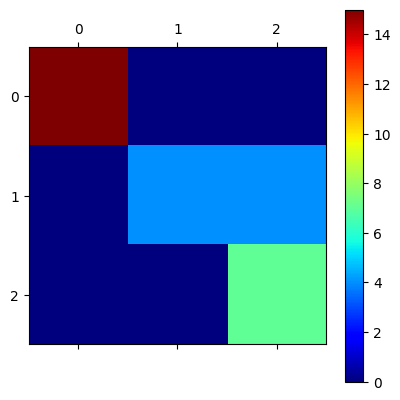

In [18]:
confusion = confusion_matrix(y_test, y_pred)
plt.matshow(confusion, cmap='jet')
plt.colorbar()

There are a couple of ways we can attempt to improve our results while still using the ridge classifier algorithm. First, since ridge classifier is a regularized algorithm, we can try applying the standard scaler to the data to change its scale.

0.8333333333333334


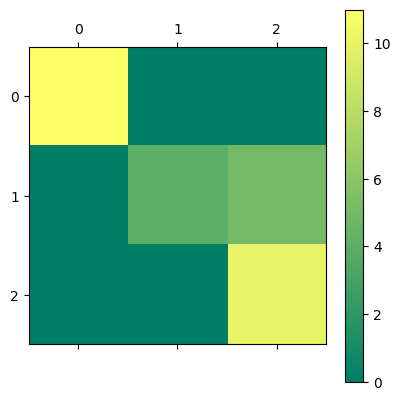

In [10]:
scaler = StandardScaler()
scaler.fit(features)
features_Z = scaler.transform(features)

X_train, X_test, y_train, y_test = train_test_split(features_Z, labels, test_size=0.2)

ridge_classifier = RidgeClassifier()
ridge_classifier.fit(X_train, y_train)
y_pred = ridge_classifier.predict(X_test)

print(ridge_classifier.score(X_test, y_test))

confusion = confusion_matrix(y_test, y_pred)

plt.matshow(confusion, cmap='summer')
plt.colorbar()

Second, the ridge classifier, like ridge regression, has a hyperparameter, $\alpha$. We can attempt to perform hyperparameter tuning to see if there is a value of $\alpha$ which will give us a better accuracy score.

In [19]:
best_score = 0
best_alpha = None
for alpha in np.logspace(-4, 4, 5000):
    ridge_classifier = RidgeClassifier(alpha = alpha)
    ridge_classifier.fit(X_train, y_train)
    y_pred = ridge_classifier.predict(X_test)

    score = ridge_classifier.score(X_test, y_test)
    
    if score > best_score:
        best_score = score
        best_alpha = alpha
print("BEST ALPHA:", best_alpha)
print("BEST SCORE:", best_score)

BEST ALPHA: 0.0001
BEST SCORE: 0.8666666666666667


## Potential Problems with Classification Data Sets

Finally, we need to discuss some potential problems that can occur when performing classification problems on real world data sets. First, it is possible that there is not a large distinction between the different classes. This does not mean that you cannot perform classification on the data set, but it may mean that you need a more complex classifier that can pick out more nuanced features in the data. Secondly, your data set may have a large number of features, too large for patterns between the classes to easily be picked out. You can handle these problems by either performing feature engineering using prior knowledge of the data set or with trial and error or perform dimsionality reduction on the data set (covered in a couple of weeks). Finally, many times when you find a data set online that has categorical data, that data will be listed as words instead of numbers. Luckily, there are many ways to covert this type of data into numerical data, such as the `LabelEncoder` function of Scikit-Learn used in the pre-class assignment for this week.